In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
from dataset import load_svhn, random_split_train_val
from gradient_check import check_layer_gradient, check_layer_param_gradient, check_model_gradient
from layers import FullyConnectedLayer, ReLULayer
from model import TwoLayerNet
from trainer import Trainer, Dataset
from optim import SGD, MomentumSGD
from metrics import multiclass_accuracy

In [3]:
def prepare_for_neural_network(train_X, test_X):
    train_flat = train_X.reshape(train_X.shape[0], -1).astype(np.float) / 255.0
    test_flat = test_X.reshape(test_X.shape[0], -1).astype(np.float) / 255.0
    
    # Subtract mean
    mean_image = np.mean(train_flat, axis = 0)
    train_flat -= mean_image
    test_flat -= mean_image
    
    return train_flat, test_flat
    
train_X, train_y, test_X, test_y = load_svhn("data", max_train=10000, max_test=1000)    
train_X, test_X = prepare_for_neural_network(train_X, test_X)
# Split train into train and val
train_X, train_y, val_X, val_y = random_split_train_val(train_X, train_y, num_val = 1000)

In [4]:
# TODO: Implement ReLULayer layer in layers.py
# Note: you'll need to copy implementation of the gradient_check function from the previous assignment

X = np.array([[1,-2,3],
              [-1, 2, 0.1]
              ])

assert check_layer_gradient(ReLULayer(), X)

Gradient check passed!


In [5]:
# TODO: Implement FullyConnected layer forward and backward methods
assert check_layer_gradient(FullyConnectedLayer(3, 4), X)
# TODO: Implement storing gradients for W and B
assert check_layer_param_gradient(FullyConnectedLayer(3, 4), X, 'W')
assert check_layer_param_gradient(FullyConnectedLayer(3, 4), X, 'B')

Gradient check passed!
Gradient check passed!
Gradient check passed!


In [6]:
# TODO: In model.py, implement compute_loss_and_gradients function
model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 3, reg = 0)
loss = model.compute_loss_and_gradients(train_X[:2], train_y[:2])

# TODO Now implement backward pass and aggregate all of the params
check_model_gradient(model, train_X[:2], train_y[:2])

Checking gradient for W1
Gradient check passed!
Checking gradient for B1
Gradient check passed!
Checking gradient for W2
Gradient check passed!
Checking gradient for B2
Gradient check passed!


True

In [55]:
# TODO Now implement l2 regularization in the forward and backward pass
model_with_reg = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 3, reg = 1e1)
loss_with_reg = model_with_reg.compute_loss_and_gradients(train_X[:2], train_y[:2])
assert loss_with_reg > loss and not np.isclose(loss_with_reg, loss), \
    "Loss with regularization (%2.4f) should be higher than without it (%2.4f)!" % (loss, loss_with_reg)

check_model_gradient(model_with_reg, train_X[:2], train_y[:2])

Checking gradient for W1
Gradient check passed!
Checking gradient for B1
Gradient check passed!
Checking gradient for W2
Gradient check passed!
Checking gradient for B2
Gradient check passed!


True

In [8]:
# Finally, implement predict function!

# TODO: Implement predict function
# What would be the value we expect?
multiclass_accuracy(model_with_reg.predict(train_X[:30]), train_y[:30])

0.1

In [75]:
model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 1e1)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, SGD(), learning_rate = 1e-2, num_epochs=5)

# TODO Implement missing pieces in Trainer.fit function
# You should expect loss to go down every epoch, even if it's slow
loss_history, train_history, val_history = trainer.fit()

Loss: 2.301712, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.302345, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.302075, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.302357, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.302029, Train accuracy: 0.196667, val accuracy: 0.206000


[2.3214021629438735, 2.3023726217043783, 2.3023775606506165, 2.3023763950360387, 2.302381118613543]


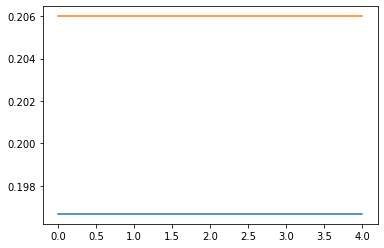

In [76]:
print(loss_history)
plt.plot(train_history)
plt.plot(val_history)

In [77]:
# TODO Implement learning rate decay inside Trainer.fit method
# Decay should happen once per epoch

model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 1e-1)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, SGD(), learning_rate_decay=0.99)

initial_learning_rate = trainer.learning_rate
loss_history, train_history, val_history = trainer.fit()

assert trainer.learning_rate < initial_learning_rate, "Learning rate should've been reduced"
assert trainer.learning_rate > 0.5*initial_learning_rate, "Learning rate shouldn'tve been reduced that much!"

Loss: 2.307681, Train accuracy: 0.125889, val accuracy: 0.128000
Loss: 2.303441, Train accuracy: 0.119222, val accuracy: 0.122000
Loss: 2.302732, Train accuracy: 0.109778, val accuracy: 0.115000
Loss: 2.302611, Train accuracy: 0.100667, val accuracy: 0.100000
Loss: 2.302590, Train accuracy: 0.099000, val accuracy: 0.093000
Loss: 2.302586, Train accuracy: 0.099000, val accuracy: 0.093000
Loss: 2.302585, Train accuracy: 0.099000, val accuracy: 0.093000
Loss: 2.302585, Train accuracy: 0.099000, val accuracy: 0.093000
Loss: 2.302585, Train accuracy: 0.099000, val accuracy: 0.093000
Loss: 2.302585, Train accuracy: 0.099000, val accuracy: 0.093000
Loss: 2.302585, Train accuracy: 0.099000, val accuracy: 0.093000
Loss: 2.302585, Train accuracy: 0.099000, val accuracy: 0.093000
Loss: 2.302585, Train accuracy: 0.099000, val accuracy: 0.093000
Loss: 2.302585, Train accuracy: 0.099000, val accuracy: 0.093000
Loss: 2.302585, Train accuracy: 0.099000, val accuracy: 0.093000
Loss: 2.302585, Train acc

In [78]:
# TODO: Implement MomentumSGD.update function in optim.py

model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 1e-1)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, MomentumSGD(), learning_rate_decay=0.99)

# You should see even better results than before!
loss_history, train_history, val_history = trainer.fit()

Loss: 2.256277, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.242495, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.320861, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.271387, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.273135, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.299197, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.280259, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.202608, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.277043, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.272671, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.286162, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.296893, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.350114, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.363681, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.322972, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.298520, Train acc

In [84]:
data_size = 15
model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 1e-1)
dataset = Dataset(train_X[:data_size], train_y[:data_size], val_X[:data_size], val_y[:data_size])
trainer = Trainer(model, dataset, SGD(), learning_rate=1e-1, num_epochs=150, batch_size=5)

# You should expect this to reach 1.0 training accuracy 
loss_history, train_history, val_history = trainer.fit()

Loss: 2.339903, Train accuracy: 0.200000, val accuracy: 0.133333
Loss: 2.327734, Train accuracy: 0.266667, val accuracy: 0.066667
Loss: 2.329720, Train accuracy: 0.266667, val accuracy: 0.066667
Loss: 2.300999, Train accuracy: 0.333333, val accuracy: 0.066667
Loss: 2.264758, Train accuracy: 0.266667, val accuracy: 0.000000
Loss: 2.254096, Train accuracy: 0.266667, val accuracy: 0.000000
Loss: 2.361081, Train accuracy: 0.266667, val accuracy: 0.000000
Loss: 2.183620, Train accuracy: 0.266667, val accuracy: 0.000000
Loss: 2.114134, Train accuracy: 0.400000, val accuracy: 0.000000
Loss: 2.320376, Train accuracy: 0.400000, val accuracy: 0.000000
Loss: 2.114976, Train accuracy: 0.400000, val accuracy: 0.000000
Loss: 2.301156, Train accuracy: 0.400000, val accuracy: 0.000000
Loss: 1.873130, Train accuracy: 0.400000, val accuracy: 0.000000
Loss: 2.028180, Train accuracy: 0.400000, val accuracy: 0.000000
Loss: 1.839996, Train accuracy: 0.333333, val accuracy: 0.000000
Loss: 2.149626, Train acc

Loss: 1.524885, Train accuracy: 1.000000, val accuracy: 0.000000
Loss: 1.366876, Train accuracy: 1.000000, val accuracy: 0.000000
Loss: 1.156471, Train accuracy: 1.000000, val accuracy: 0.000000
Loss: 1.239428, Train accuracy: 1.000000, val accuracy: 0.000000
Loss: 1.261447, Train accuracy: 1.000000, val accuracy: 0.000000
Loss: 1.264569, Train accuracy: 1.000000, val accuracy: 0.000000
Loss: 1.379632, Train accuracy: 1.000000, val accuracy: 0.000000
Loss: 1.093428, Train accuracy: 1.000000, val accuracy: 0.000000
Loss: 1.242367, Train accuracy: 1.000000, val accuracy: 0.000000
Loss: 1.246357, Train accuracy: 1.000000, val accuracy: 0.000000
Loss: 1.453723, Train accuracy: 1.000000, val accuracy: 0.000000
Loss: 1.392030, Train accuracy: 1.000000, val accuracy: 0.000000
Loss: 1.334849, Train accuracy: 1.000000, val accuracy: 0.000000
Loss: 1.410120, Train accuracy: 1.000000, val accuracy: 0.000000
Loss: 1.600830, Train accuracy: 1.000000, val accuracy: 0.000000
Loss: 1.273247, Train acc

In [86]:
# Now, tweak some hyper parameters and make it train to 1.0 accuracy in 20 epochs or less

model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 1e-2)
dataset = Dataset(train_X[:data_size], train_y[:data_size], val_X[:data_size], val_y[:data_size])
# TODO: Change any hyperparamers or optimizators to reach training accuracy in 20 epochs
trainer = Trainer(model, dataset, MomentumSGD(), learning_rate_decay=0.99, learning_rate=1e-1, num_epochs=20, batch_size=5)

loss_history, train_history, val_history = trainer.fit()

Loss: 2.316329, Train accuracy: 0.200000, val accuracy: 0.066667
Loss: 2.261615, Train accuracy: 0.200000, val accuracy: 0.066667
Loss: 2.190318, Train accuracy: 0.333333, val accuracy: 0.066667
Loss: 2.391057, Train accuracy: 0.400000, val accuracy: 0.000000
Loss: 1.904170, Train accuracy: 0.400000, val accuracy: 0.000000
Loss: 1.827320, Train accuracy: 0.400000, val accuracy: 0.000000
Loss: 1.869548, Train accuracy: 0.466667, val accuracy: 0.066667
Loss: 2.063250, Train accuracy: 0.600000, val accuracy: 0.066667
Loss: 1.240157, Train accuracy: 0.466667, val accuracy: 0.133333
Loss: 1.725343, Train accuracy: 0.533333, val accuracy: 0.000000
Loss: 1.243743, Train accuracy: 0.733333, val accuracy: 0.000000
Loss: 0.682226, Train accuracy: 0.733333, val accuracy: 0.000000
Loss: 1.385270, Train accuracy: 0.866667, val accuracy: 0.000000
Loss: 1.032475, Train accuracy: 0.866667, val accuracy: 0.000000
Loss: 0.422349, Train accuracy: 1.000000, val accuracy: 0.000000
Loss: 0.444226, Train acc

In [4]:
# Let's train the best one-hidden-layer network we can

learning_rates = 1e-1
reg_strength = 1e-2
learning_rate_decay = 0.99
hidden_layer_size = 120
num_epochs = 200
batch_size = 60

best_classifier = None
best_val_accuracy = None

#loss_history = []
#train_history = []
#val_history = []

# TODO find the best hyperparameters to train the network
# Don't hesitate to add new values to the arrays above, perform experiments, use any tricks you want
# You should expect to get to at least 40% of valudation accuracy
# Save loss/train/history of the best classifier to the variables above
model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = hidden_layer_size, reg = reg_strength)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, MomentumSGD(), learning_rate_decay=learning_rate_decay, learning_rate=learning_rates, num_epochs=num_epochs, batch_size=batch_size)

loss_history, train_history, val_history = trainer.fit()

#print('best validation accuracy achieved: %f' % best_val_accuracy)

Loss: 2.253752, Train accuracy: 0.287444, val accuracy: 0.298000
Loss: 1.988574, Train accuracy: 0.397889, val accuracy: 0.401000
Loss: 2.111071, Train accuracy: 0.416000, val accuracy: 0.403000
Loss: 2.149819, Train accuracy: 0.387778, val accuracy: 0.414000
Loss: 2.130706, Train accuracy: 0.419778, val accuracy: 0.418000
Loss: 1.953633, Train accuracy: 0.445556, val accuracy: 0.474000
Loss: 2.021682, Train accuracy: 0.421444, val accuracy: 0.426000
Loss: 2.146015, Train accuracy: 0.488667, val accuracy: 0.521000
Loss: 2.097752, Train accuracy: 0.420556, val accuracy: 0.412000
Loss: 2.082354, Train accuracy: 0.446556, val accuracy: 0.452000
Loss: 1.975020, Train accuracy: 0.393667, val accuracy: 0.401000
Loss: 2.147026, Train accuracy: 0.430000, val accuracy: 0.445000
Loss: 1.986432, Train accuracy: 0.437111, val accuracy: 0.471000
Loss: 1.987449, Train accuracy: 0.410444, val accuracy: 0.412000
Loss: 2.031112, Train accuracy: 0.446000, val accuracy: 0.451000
Loss: 2.227648, Train acc

Loss: 1.910346, Train accuracy: 0.609333, val accuracy: 0.605000
Loss: 1.997464, Train accuracy: 0.605889, val accuracy: 0.615000
Loss: 2.095986, Train accuracy: 0.575556, val accuracy: 0.568000
Loss: 1.911134, Train accuracy: 0.592000, val accuracy: 0.599000
Loss: 1.563791, Train accuracy: 0.592333, val accuracy: 0.599000
Loss: 1.963902, Train accuracy: 0.567889, val accuracy: 0.582000
Loss: 2.054400, Train accuracy: 0.610111, val accuracy: 0.590000
Loss: 1.876331, Train accuracy: 0.607333, val accuracy: 0.603000
Loss: 1.891943, Train accuracy: 0.613000, val accuracy: 0.604000
Loss: 1.831656, Train accuracy: 0.612556, val accuracy: 0.605000
Loss: 1.733175, Train accuracy: 0.604667, val accuracy: 0.599000
Loss: 1.925492, Train accuracy: 0.581222, val accuracy: 0.574000
Loss: 2.015535, Train accuracy: 0.607667, val accuracy: 0.591000
Loss: 2.004098, Train accuracy: 0.570778, val accuracy: 0.587000
Loss: 1.890133, Train accuracy: 0.600000, val accuracy: 0.603000
Loss: 2.093292, Train acc

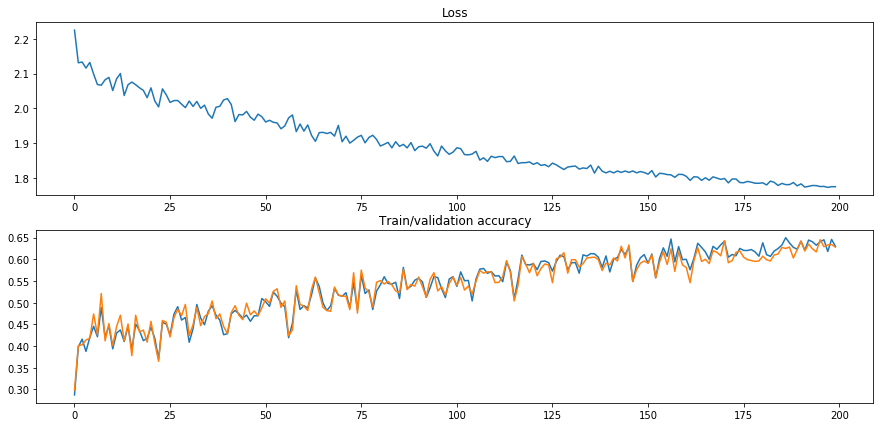

In [5]:
plt.figure(figsize=(15, 7))
plt.subplot(211)
plt.title("Loss")
plt.plot(loss_history)
plt.subplot(212)
plt.title("Train/validation accuracy")
plt.plot(train_history)
plt.plot(val_history)

In [6]:
test_pred = model.predict(test_X)
test_accuracy = multiclass_accuracy(test_pred, test_y)
print('Neural net test set accuracy: %f' % (test_accuracy, ))

Neural net test set accuracy: 0.586000
